In [1]:
import matplotlib.pyplot as plt

from pennylane import numpy as np

from qbmqsp.qbm import QBM
from qbmqsp.utils import construct_fcqbm_pauli_strings
from gen_data import xxz_gibbs_state, basis_encoding, gen_boltzmann_dist, gen_discrete_gauss_dist

In [2]:
def plot_qbm_training_progress(losses, aa_grad_θs):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
    ax0.plot(losses, '-', color='tab:blue')
    ax1.plot(aa_grad_θs, '-', color='tab:orange')
    ax0.set_xlabel("epoch"), ax0.set_ylabel("$S$"), ax0.grid(), ax0.set_yscale('log')
    ax1.set_xlabel("epoch"), ax1.set_ylabel("AAD of $\\nabla_{\\theta} \\ S$"), ax1.grid(), ax1.set_yscale('log')
    fig.subplots_adjust(wspace=0.3)

**----------------- Quantum Data ------------------------------**


Starting MATLAB engine.. Done.

Epoch 10: relative entropy S = 0.004207786921608836
          absolute average of grad_θ = 0.0066748614806583315
Epoch 20: relative entropy S = 0.0009362431250401482
          absolute average of grad_θ = 0.002387441744483584
Epoch 30: relative entropy S = 0.00028264238926967167
          absolute average of grad_θ = 0.0010104611954005627
Epoch 40: relative entropy S = 0.00010035161717958374
          absolute average of grad_θ = 0.000491973652870362
Epoch 50: relative entropy S = 3.8306646853891735e-05
          absolute average of grad_θ = 0.0002968570690041888
Epoch 60: relative entropy S = 1.508536052519105e-05
          absolute average of grad_θ = 0.00019511848048932315
Epoch 70: relative entropy S = 6.0258959888592756e-06
          absolute average of grad_θ = 0.00012714039389691905
Epoch 80: relative entropy S = 2.4244699659004e-06
          absolute average of grad_θ = 8.18978907381982e-05
Epoch 90: relative entropy S = 9.793815161085462e-07
  

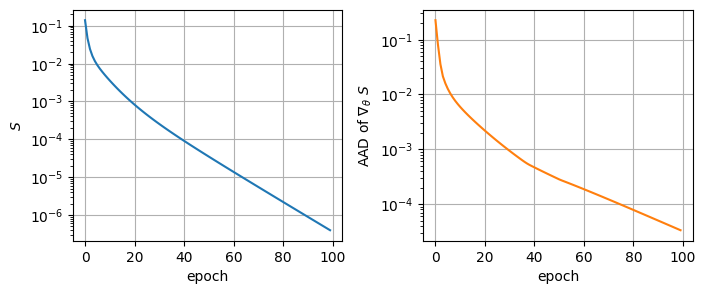

In [3]:
### Fit Gibbs state of Heisenberg XXZ Hamiltonian in terms of Jaynes' principle
n_qubits = 3
h = construct_fcqbm_pauli_strings(n_qubits)
nparams = len(h)
np.random.seed(seed=1)
θ_init = np.random.random(nparams) / nparams
enc = 'general'
δ = 0.3
polydeg = 100
β = 1.0
learning_rate = 0.5
epochs = 100

ρ_data = xxz_gibbs_state(n_qubits, J=0.5, Δ=0.75, β=β)
ρ_data_is_pure = False

qbm = QBM(h, θ_init, enc, δ, polydeg, β)
losses, aa_grad_θs = qbm.train(ρ_data, learning_rate, epochs)
del qbm.qsp

plot_qbm_training_progress(losses, aa_grad_θs)


Starting MATLAB engine.. Done.

Epoch 10: relative entropy S = 0.004207786674179426
          absolute average of grad_θ = 0.0066748613967137
Epoch 20: relative entropy S = 0.0009362430418131673
          absolute average of grad_θ = 0.002387441420116742
Epoch 30: relative entropy S = 0.00028264239937603186
          absolute average of grad_θ = 0.001010461227671821

Final relative entropy S = 0.00028264239937603186
Final absolute average of grad_θ = 0.001010461227671821
Final quadratic error = (7.515671116768158e-06-1.2924697071141057e-26j)

Stopping MATLAB engine ... Done.



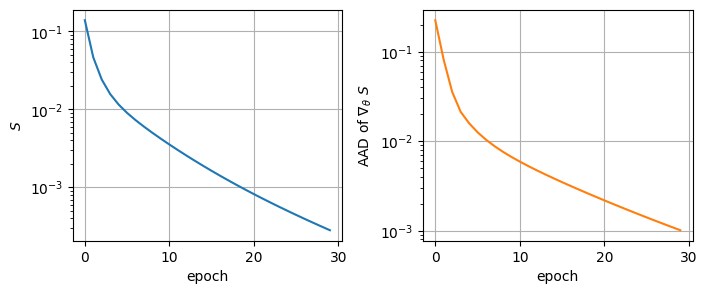

In [4]:
enc = 'lcu'
epochs = 30

qbm = QBM(h, θ_init, enc, δ, polydeg, β)
losses, aa_grad_θs = qbm.train(ρ_data, learning_rate, epochs)
del qbm.qsp

plot_qbm_training_progress(losses, aa_grad_θs)

**----------------- Classical Data ------------------------------**


Starting MATLAB engine.. Done.

Epoch 10: relative entropy S = 0.06437326645078892
          absolute average of grad_θ = 0.01805279135642566
Epoch 20: relative entropy S = 0.03369261372131059
          absolute average of grad_θ = 0.009120314097175473
Epoch 30: relative entropy S = 0.02286240882619588
          absolute average of grad_θ = 0.006100689246993663
Epoch 40: relative entropy S = 0.01731432416199346
          absolute average of grad_θ = 0.004583232495854408
Epoch 50: relative entropy S = 0.013938920018744017
          absolute average of grad_θ = 0.003670805936429346
Epoch 60: relative entropy S = 0.011667941401822722
          absolute average of grad_θ = 0.0030617807627877137
Epoch 70: relative entropy S = 0.010035099951337697
          absolute average of grad_θ = 0.0026264220874505813
Epoch 80: relative entropy S = 0.008804332043582488
          absolute average of grad_θ = 0.0022997347484853955
Epoch 90: relative entropy S = 0.007843276978395897
          absolute av

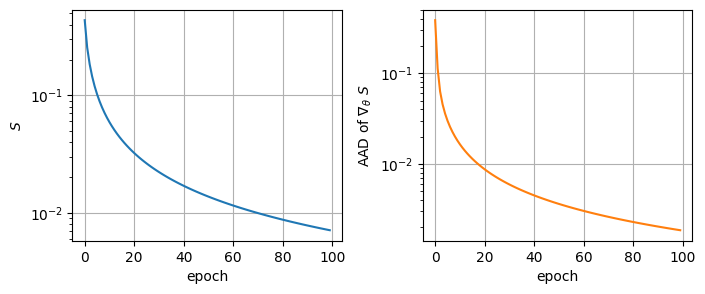

In [5]:
### Fit Boltzmann distribution
n_qubits = 3
h = construct_fcqbm_pauli_strings(n_qubits)
nparams = len(h)
np.random.seed(seed=1)
θ_init = np.random.random(nparams) / nparams
enc = 'general'
δ = 0.3
polydeg = 100
β = 1.0
learning_rate = 0.5
epochs = 100

f_boltzmann = gen_boltzmann_dist(n_qubits, β)
ρ_data = basis_encoding(f_boltzmann)

qbm = QBM(h, θ_init, enc, δ, polydeg, β)
losses, aa_grad_θs = qbm.train(ρ_data, learning_rate, epochs)
del qbm.qsp

plot_qbm_training_progress(losses, aa_grad_θs)


Starting MATLAB engine.. Done.

Epoch 10: relative entropy S = 0.09917973047247493
          absolute average of grad_θ = 0.021523263725587726
Epoch 20: relative entropy S = 0.054571964939285615
          absolute average of grad_θ = 0.011261030516465613
Epoch 30: relative entropy S = 0.037767293744721604
          absolute average of grad_θ = 0.007645772933175528
Epoch 40: relative entropy S = 0.028881578671608586
          absolute average of grad_θ = 0.005785562923470695
Epoch 50: relative entropy S = 0.02337634980709829
          absolute average of grad_θ = 0.004650909919880894
Epoch 60: relative entropy S = 0.01962974768198455
          absolute average of grad_θ = 0.00388630902671135
Epoch 70: relative entropy S = 0.016915257431027206
          absolute average of grad_θ = 0.0033366419546858985
Epoch 80: relative entropy S = 0.014858274517393702
          absolute average of grad_θ = 0.0029224308542572454
Epoch 90: relative entropy S = 0.013245900700841527
          absolute av

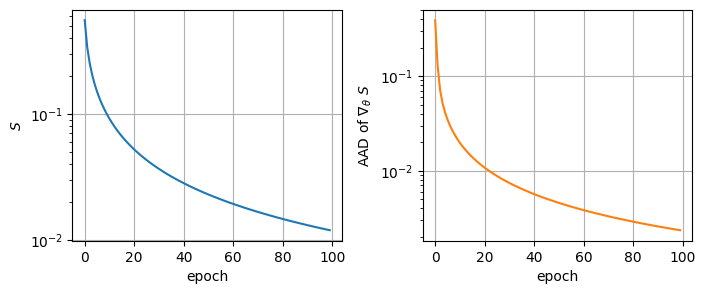

In [6]:
### Fit Gauss distribution
n_qubits = 3
h = construct_fcqbm_pauli_strings(n_qubits)
nparams = len(h)
np.random.seed(seed=1)
θ_init = np.random.random(nparams) / nparams
enc = 'general'
δ = 0.3
polydeg = 100
β = 1.0
learning_rate = 0.5
epochs = 100

f_gauss = gen_discrete_gauss_dist(2**n_qubits)
ρ_data = basis_encoding(f_gauss)

qbm = QBM(h, θ_init, enc, δ, polydeg, β)
losses, aa_grad_θs = qbm.train(ρ_data, learning_rate, epochs)
del qbm.qsp

plot_qbm_training_progress(losses, aa_grad_θs)